## 1. Zaimportowanie zbioru danych "Credit card fraud detection"

Pobierz dane z https://www.kaggle.com/mlg-ulb/creditcardfraud

In [4]:
import pandas as pd
df = pd.read_csv("creditcard.csv")
print("Wymiary wczytanych danych:")
print(df.shape)
print("Pierwsze elementy:")
df.head()

Wymiary wczytanych danych:
(284807, 31)
Pierwsze elementy:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 2. Histogramy cech

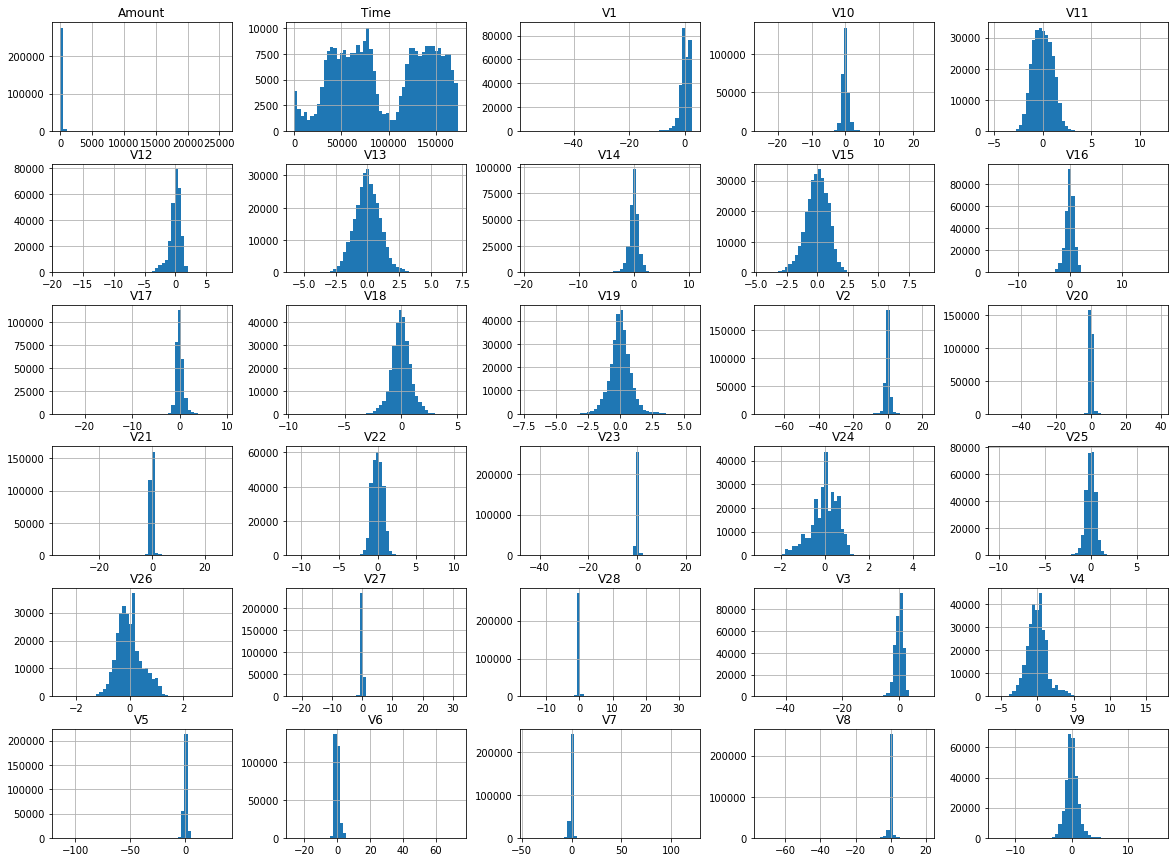

In [5]:
import matplotlib.pyplot as plt

df.iloc[:,:30].hist(bins=50, figsize=(20,15))
plt.show()

## 3. Transformacja rozkładu cech

Jak widać na powyższych wykresach - hisgoramy niektórych cech bardzo mocno odbiegają od rozkładu normalnego (np. 'amount'). Za pomocą algorytmu yeo-johnson postaramy się skrócić "długie ogony" w histogramach.

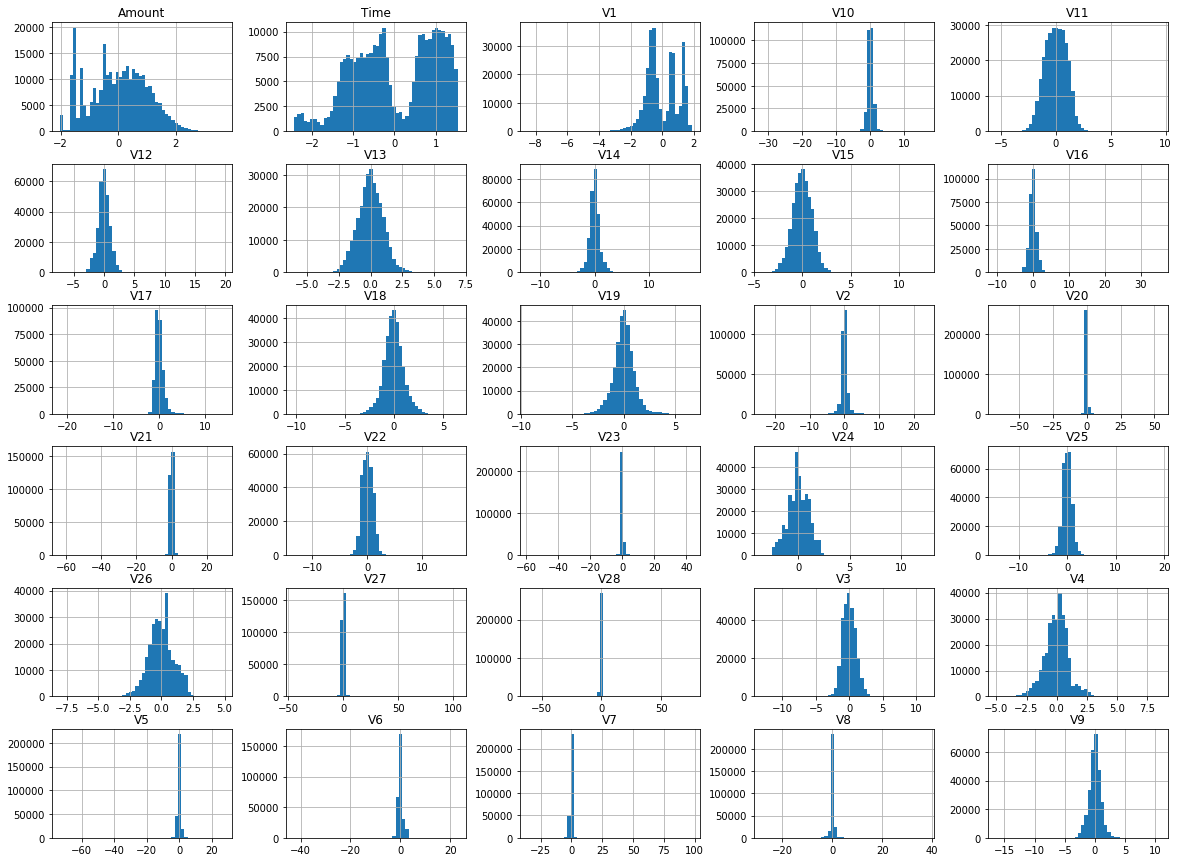

In [10]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer() # obiekt do zmian rozkłądu cech - domyślnie używa algorytmu yeo-yohnson, możemy zmienić na box-cox

features_transformed = pt.fit_transform(df.iloc[:,:30])
df_features_transformed = pd.DataFrame(data=features_transformed, columns=df.iloc[:,:30].columns) # utworzenie Pandas DataFrame z obiektu Numpy dla łatwiejszego wyrysowania histogramów 
df_features_transformed.hist(bins=50, figsize=(20,15))
plt.show()

Algorytm poradził sobie z poszczególnymi cechami z różną skutecznością. Jako udany przykład możemy podać podownie cechę 'Amount'. W dalszej części programu nie będziemy korzystali ze zmiennej df_features_transformed. Użyliśmy jej wyłącznie do wyrysowania histogramu. Transformacje tego typu powinniśmy wykonywać już po podzieleniu na zestawy uczące, walidacyjne i testowy (PowerTransform() wstawimy w obiekt Pipe).

Przy domyślnych ustawieniach PowerTransform transformuje dane tak, żeby wartość oczekiwana cech wynosiła 0, a ich wariancja 1 - z tego powodu nie musimy już korzystać z obiektu StandardScaler.

## 4. Ekstrakcja etykiet i cech

In [11]:
import numpy as np

y = df.values[:,30].astype(np.int64) # część modeli wymaga etykiet w formie int
X = df.values[:,:30] # cechy

## 5. Podzielenie danych na zestaw do trenowania i (finalnego) testowania

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                            y, test_size=0.3, random_state=1, stratify=y)
# metoda domyślnie losowo dobiera elementy do zbiorów,
# ustalenie random_state umożliwia podzielenie za każdym razem tak samo - co ułatwia porównywanie dokładności modelu

# opcjonalny parametr 'stratify' dobiera elementy tak,
# żeby zachować równe proporcje etykiet w zmiennych y, y_train, y_test

## 6. Wyświetlenie liczby konkretnych etykiet w zbiorach

In [14]:
print('Liczba etykiet w zbiorze y:', np.bincount(y))
print('Liczba etykiet w zbiorze y_train:', np.bincount(y_train))
print('Liczba etykiet w zbiorze y_test:', np.bincount(y_test))

Liczba etykiet w zbiorze y: [284315    492]
Liczba etykiet w zbiorze y_train: [199020    344]
Liczba etykiet w zbiorze y_test: [85295   148]


## 7. Trenowanie pierwszego, bardzo prostego modelu

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0, n_jobs=-1).fit(X_train, y_train)
# parametr n_jobs określa liczbę wątków procesora, którą ma wykorzystać model
# wpisanie n_jobs=-1 wykorzystuje wszystkie dostępne zasoby

pred = lr.predict(X_test)
good_predictions = np.sum(pred == y_test)
print("Regresja logistyczna z domyślnymi parametrami (regularyzacja L2)")
print("Dobre predykcje: ", good_predictions)
print("Złe predykcje: ", y_test.size - good_predictions)
print("Dokładność predykcji: ", good_predictions/y_test.size) ## równe lr.score(X_test, y_test)

D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 6.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Regresja logistyczna z domyślnymi parametrami (regularyzacja L2)
Dobre predykcje:  85372
Złe predykcje:  71
Dokładność predykcji:  0.99916903666772


## 8. Oszacowanie ważności cech za pomocą algorytmu Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

forest = RandomForestClassifier(n_estimators=100, random_state=1, n_jobs=-1)
forest.fit(X_train, y_train)
print('Dokładność modelu Random Forest z domyślnymi cechami: ', forest.score(X_test, y_test))
importances = forest.feature_importances_

print('"Ważności cech" ("feature importances"):')
print(importances)

Dokładność modelu Random Forest z domyślnymi cechami:  0.9996137776061234
"Ważności cech" ("feature importances"):
[0.01251749 0.01557565 0.01278201 0.01620406 0.03430231 0.01227077
 0.01439554 0.02151382 0.01248032 0.03298923 0.07916482 0.06022813
 0.1282609  0.01086106 0.12526757 0.01491365 0.07045173 0.15142207
 0.03071526 0.01377821 0.01506146 0.02202482 0.01038208 0.00665879
 0.01045829 0.00876841 0.02083057 0.0130167  0.01086344 0.01184084]


## 9. Dobór cech z określonym progiem "feature importance" 

In [18]:
from sklearn.feature_selection import SelectFromModel

threshold = 0.03
sfm = SelectFromModel(forest, threshold=threshold, prefit=True)
# powyższa klasa służy do wyciągania z modelu 'random forest' najistotniejszych cech
# z "feature importance" powyżej określonego progu "threshold"

# prefit=True oznacza, że model został już wytrenowany
X_train_sfm = sfm.transform(X_train)
X_test_sfm = sfm.transform(X_test)
print('Liczba cech z "feature importance" powyżej %f: %d' % (threshold, X_train_sfm.shape[1]))
print("Number of selected features: ", X_train_sfm.shape[1]) # TODO: remove

Liczba cech z "feature importance" powyżej 0.030000: 9
Number of selected features:  9


## 10. Strojenie hiperparametrów SVM za pomocą GridSearchCV

In [19]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

# pipeline'y służą do łączenia kilku klas, które kolejno wykonują
# określone zadania na zbiorze danych

# StandardScaler skaluje wszystkie cechy zestawu do trenowania (X_train) tak,
# żeby ich wartość oczekiwana wynosiła 0, a wariancja 1
pipe_svc = make_pipeline(PowerTransformer(), SVC(random_state=1))

param_C_range = [0.8, 0.9, 1.0]
param_gamma_range = [0.05, 0.1, 0.2, 0.3, 0.4] # wartości zostały zawężone po wielu próbach

# lista parametrów, dla których algorytm ma zostać przetestowany
param_grid = [{'svc__C' : param_C_range,
             'svc__gamma': param_gamma_range,
             'svc__max_iter': [200],
             'svc__kernel': ['rbf']}]
# kernel rbf - wykorzystujemy jądro Gaussowskie, które wykrywa nieliniowe regresje

# klasa szukająca najlepszej wersji modelu dla podanej listy parametrów
gs = GridSearchCV(estimator = pipe_svc,
                 param_grid=param_grid,
                 scoring='accuracy',
                 cv=10,
                 n_jobs=-1)
# parametr cv jest odpowiedzialny za liczenie średniej dokładności
# poprzez cross-validation (podział danych na określoną liczbę równych części
# i traktowanie kolejno każdej z nich jako dane walidacyjne, a resztę do trenowania)
gs = gs.fit(X_train_sfm, y_train)
print('gs.best_score_', gs.best_score_)
print('gs.best_params_', gs.best_params_)

D:\soft\Continuum\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


gs.best_score_ 0.9995636122870729
gs.best_params_ {'svc__C': 0.9, 'svc__gamma': 0.1, 'svc__kernel': 'rbf', 'svc__max_iter': 200}


D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


## 9. Wyliczenie dokładności dla zestawu testowego oddzielonego w pkt. 5

In [20]:
clf = gs.best_estimator_
clf.fit(X_train_sfm, y_train)
pred = clf.predict(X_test_sfm)
good_predictions = np.sum(pred == y_test)
print("SVC z parametrami określonymi przez GridSearchCV i transformacją rozkładu cech")
print("Dobre predykcje: ", good_predictions)
print("Złe predykcje: ", y_test.size - good_predictions)
print("Dokładność predykcji: ", good_predictions/y_test.size) ## równe clf.score(X_test, y_test)

D:\soft\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC z parametrami określonymi przez GridSearchCV i transformacją rozkładu cech
Dobre predykcje:  85409
Złe predykcje:  34
Dokładność predykcji:  0.999602073897218


## 10. Przedstawienie wyników w innej metryce
Sama dokłądność może być kiepską miarą - szczególnie w takim przypadku jak powyższy, gdzie w przybliżeniu 99.827% przykładów należy do jednej klasy. Nieco więcej informacji daje nam analiza z podziałem na fałszywie/prawdziwie sklasyfikowane zestawe dla obydwu klas.

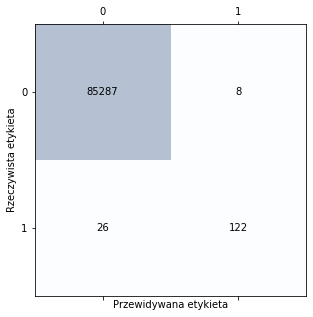

In [21]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

confmat = confusion_matrix(y_true=y_test, y_pred=pred)
fig, ax = plt.subplots(figsize=(5,5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,
               s=confmat[i,j],
               va='center', ha='center')
plt.xlabel('Przewidywana etykieta')
plt.ylabel('Rzeczywista etykieta')
plt.show()

## 11. Co zrobiłbym z obecną wiedzą

- **metryka ROC AUC**
- **zastosowanie oversamplingu, undersamplingu, parametru "class_weights" - sposobów na radzenie sobie z sytuacją, w której jedna klasa jest dużo bardziej liczna od drugiej**
- praca nad szeregiem czasowym Time
- feature selection wykonany za pomocą mutual information
- zastosowanie algorytmów LightGBM, XGB
- szukanie wartości odstających (outliers)
- zastosowanie algorytmu Bayesian Optimization do strojenia algorytmów